In [1]:
from dpm.transforms import Transform, InverseTransform, Radial, Planar, NICE
from dpm.distributions import Normal, Uniform, TransformDistribution
from dpm.criterion import cross_entropy
from dpm.train import train
from dpm.visualize import plot_contour, plot_hist, plot_stats
from dpm.utils import integrate
import torch

In [2]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [Radial(2)
                               for _ in range(32)])



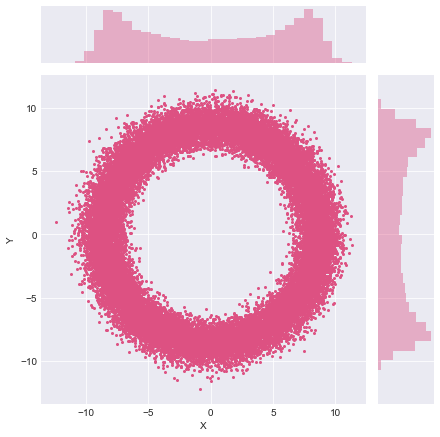

In [3]:
samples = model.sample(30000).detach()
plot_hist(samples)
# plot_contour(model, rng=(-2, 2))

In [4]:
# integrate(model, rng=(-1, 1), n_points=1000000)

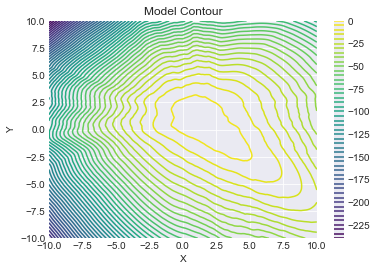

In [12]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [NICE(2, num_hidden_layers=2, 
                                    hidden_size=16)
                               for _ in range(32)])


plot_contour(model, rng=(-10, 10))

In [13]:
from dpm.train import train
from dpm.criterion import cross_entropy
from dpm.distributions import Data

In [14]:
p = Data(samples)

In [15]:
stats = train(p, model, cross_entropy, epochs=2000, log_interval=100, track_parameters=False)

[Epoch 0/2000]	Loss 49.40
[Epoch 100/2000]	Loss 7.29
[Epoch 200/2000]	Loss 6.96
[Epoch 300/2000]	Loss 6.61
[Epoch 400/2000]	Loss 6.13
[Epoch 500/2000]	Loss 5.69
[Epoch 600/2000]	Loss 5.72
[Epoch 700/2000]	Loss 5.56
[Epoch 800/2000]	Loss 5.89
[Epoch 900/2000]	Loss 5.83
[Epoch 1000/2000]	Loss 5.54
[Epoch 1100/2000]	Loss 5.70
[Epoch 1200/2000]	Loss 5.56
[Epoch 1300/2000]	Loss 5.52
[Epoch 1400/2000]	Loss 5.48
[Epoch 1500/2000]	Loss 5.32
[Epoch 1600/2000]	Loss 5.67
[Epoch 1700/2000]	Loss 5.34
[Epoch 1800/2000]	Loss 5.49
[Epoch 1900/2000]	Loss 5.48


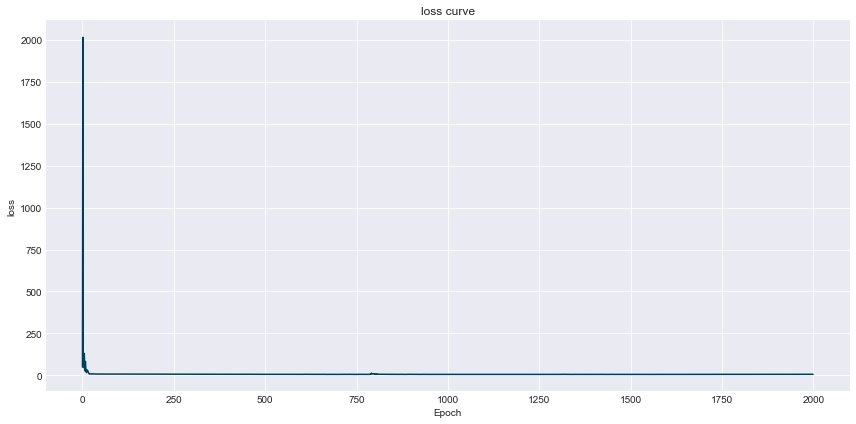

In [16]:
plot_stats(stats)

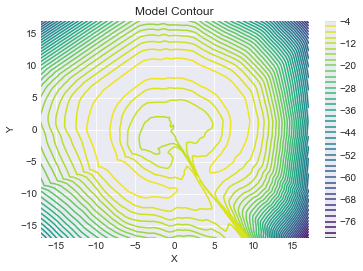

In [17]:
plot_contour(model, rng=(-17, 17))

In [18]:
model.num_parameters

41156